# ELU 502 Deep learning -- Lab session 5
Pierre-Henri Conze, François Rousseau, Ronan Fablet - session: 1h20 (17th april)+3h (20th april)

### Objectives: perform classification on Fashion-MNIST dataset using multiple layer perceptrons, convolutional neural networks, data augmentation and transfer learning to obtain the best classification results as possible!

First, download and read the Fashion-MNIST data.

In [1]:
%matplotlib inline
import keras
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


### Part 1 - Data management and visualization

#### 1) Fashion-MNIST is a dataset consisting of a training set of A examples and a test set of B examples. Each example is a CxC grayscale image, associated with a label from D classes. What are the values for A, B, C and D?

In [2]:
A = x_train.shape[0]
B = x_test.shape[0]
C = x_train.shape[1]
D = 0
elts = []
for elt in y_train :
    if elt not in elts :
        D += 1
        elts.append(elt)

print(A,B,C,D)

60000 10000 28 10


In [3]:
print(x_train.shape)

(60000, 28, 28)


Each training/test sample is assigned to one of the following labels: 
0	T-shirt
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [4]:
num_classes = 10
class_names = ['tshirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'boot']
import matplotlib.pyplot as plt





#### 2) Visualize one example per class among the training dataset:

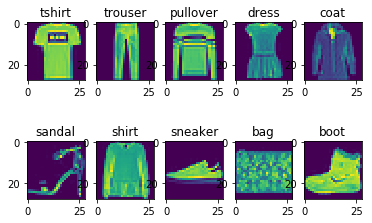

(60000, 28, 28)


In [5]:
for i in range(10): 
    plt.subplot(2, 5,i+1)
    sample = x_train[y_train==i][0]
    plt.imshow(sample)
    plt.title(class_names[i])
    
plt.show()


print(x_train.shape)


### Part 2 - Multi-layer perceptrons

#### 3) Define a simple Keras multi-layer perceptron (MLP) architecture using Sequential API and containing 3 dense layers: 2 dense layers with 512 units and ReLU activation followed by 1 dense layer for softmax regression. Use your model to get first classification results on Fashion MNIST.

In [6]:
num_classes = 10
z_train = keras.utils.to_categorical(y_train, num_classes)
z_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [8]:
mlp_1 = Sequential()
x_train = x_train.reshape(A, 784)/255.0
x_test = x_test.reshape(B, 784)/255.0

dense1 = Dense(512, activation = "relu",input_shape=(784,))
mlp_1.add(dense1)

dense2 = Dense(512, activation = "relu")
mlp_1.add(dense2)

dense3 = Dense(10, activation = "softmax")
mlp_1.add(dense3)

mlp_1.summary()
mlp_1.compile(loss="categorical_crossentropy",optimizer="sgd", metrics=["accuracy"])
hist_mlp_1 = mlp_1.fit(x_train, z_train, batch_size = 256, epochs=20, validation_data=[x_test, z_test])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 206us/step - loss: 1.2472 - acc: 0.6431 - val_loss: 0.8596 - val_acc: 0.7141
Epoch 2/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.7490 - acc: 0.7613 - val_loss: 0.6986 - val_acc: 0.7724
Epoch 3/20
60000/60000 [==============================] - 1s 15us/step - l

#### 4) Define a generic function evaluate_model() able to:
- plot the evolution of accuracy for both training and testing data with respect to the epochs
- compute final test loss and accuracy. 

Use this function to assess the performance of the previously defined model.

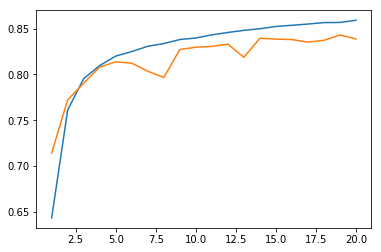

In [9]:
def evaluate_model(model): 
    h = model.history
    n_epochs = len(h.history['acc'])
    epochs = [i+1 for i in range(n_epochs)]
    plt.plot(epochs, h.history['acc'])
    plt.plot(epochs,h.history['val_acc'])
evaluate_model(mlp_1)



Comments: On remarque qu'il y a toujours une accuracy d'entraînement supérieure à l'accuracy de test, sauf pour les premières epochs (cela arrive, selon le professeur). On remarque aussi que l'accuracy d'entraînement est plus "lisse" que celle de test, cela est dû au fait que la généralisation est plus sensible au fluctuations dans les données que l'entraînement.

#### 5) Define a deeper multi-layer perceptron (MLP) architecture to outperform the previously obtained classification results. 
Use evaluate_model() to provide the evaluation and comment the performance.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 228)               116964    
_________________________________________________________________
dense_7 (Dense)              (None, 228)               52212     
_________________________________________________________________
dense_8 (Dense)              (None, 114)               26106     
_________________________________________________________________
dense_9 (Dense)              (None, 114)               13110     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1150      
Total para

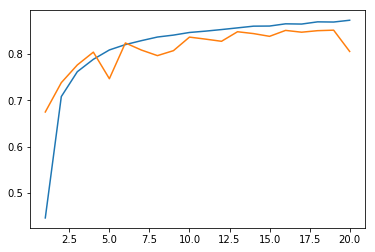

In [10]:
mlp_2 = Sequential()
dense1 = Dense(512, activation = "relu",input_shape=(784,))
mlp_2.add(dense1)

dense2 = Dense(512, activation = "relu")
mlp_2.add(dense2)

dense3 = Dense(228, activation = "relu")
mlp_2.add(dense3)

dense4 = Dense(228, activation = "relu")
mlp_2.add(dense4)

dense5 = Dense(114, activation = "relu")
mlp_2.add(dense5)

dense6 = Dense(114, activation = "relu")
mlp_2.add(dense6)
classification = Dense(10, activation = "softmax")
mlp_2.add(classification)

mlp_2.summary()
mlp_2.compile(loss="categorical_crossentropy",optimizer="sgd", metrics=["accuracy"])
hist_mlp_2 = mlp_2.fit(x_train, z_train, batch_size = 256, epochs=20, validation_data=[x_test, z_test])
evaluate_model(mlp_2)


Conclusion: Il semblerait qu'il y ait une limite à l'accuracy que l'on peut atteindre (un peu en dessous de 90%) pour une telle tâche de classification avec des MLP. Cela est certainement dû au fait que les MLP ne prennent pas en compte les structures spatiales locales, que l'on peut pourtant aisément identifier comme fondamentales pour identifier différents types de vêtements. 

### Part 3 - Convolutional neural networks

##### 6) Define a simple Keras convolutional neural network (CNN) architecture using Sequential API and containing the following layers : 1 convolution layer using Conv2D and 32 filters, 1 max-polling layer using MaxPooling2D, 2 dense layers using ReLU and softmax activations respectively. Use this model to get classification results (use evaluate_model() as previously) and compared them to MLP results. 

In [11]:
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 58us/step - loss: 1.1674 - acc: 0.6487 - val_loss: 0.7560 - val_acc: 0.7414
Epoch 2/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.6453 - acc: 0.7826 - val_loss: 0.6111 - val_acc: 0.7857
Epoch 3/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.5619 - acc: 0.8051 - val_loss: 0.5594 - val_acc: 0.7978
Epoch 4/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.5244 - acc: 0.8152 - val_loss: 0.6001 - val_acc: 0.7633
Epoch 5/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.5022 - acc: 0.8223 - val_loss: 0.6195 - val_acc: 0.7579
Epoch 6/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.4816 - acc: 0.8317 - val_loss: 0.4850 - val_acc: 0.8295
Epoch 7/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.4685 - acc: 0.8352 - val_loss: 0.5302 - val_acc

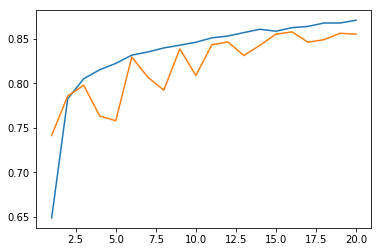

In [12]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
num_classes = 10
x_train  = x_train.reshape(60000,28,28,1)/255.0
x_test = x_test.reshape(10000,28,28,1)/255.0
y_test.reshape(10000,1,1)
y_train.reshape(60000,1,1)
z_train = keras.utils.to_categorical(y_train, num_classes)
z_test = keras.utils.to_categorical(y_test, num_classes)

cnn_1 = Sequential()
cnn_1.add(Conv2D(filters=32, kernel_size = (3,3), input_shape=(28,28,1)))
cnn_1.add(MaxPooling2D())
cnn_1.add(Flatten())
cnn_1.add(Dense(512, activation="relu"))
cnn_1.add(Dense(10, activation="softmax"))
cnn_1.compile(loss="categorical_crossentropy",optimizer="sgd", metrics=["accuracy"])
hist_cnn_1 = cnn_1.fit(x_train, z_train, batch_size = 256, epochs=20, validation_data=[x_test, z_test])
evaluate_model(cnn_1)

Comments: Une couche de convolution ne semble pas suffire à obtenir une accuracy qui soit vraiment différente de celle obtenue avec des MLP. Cela s'explique certainement par le fait que une unique couche ne détecte que des low-level features.

#### 7) As for MLP, define a deeper CNN architecture to outperform the previously obtained classification results. What are your conclusions?

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 61us/step - loss: 1.5247 - acc: 0.4955 - val_loss: 0.9836 - val_acc: 0.6720
Epoch 2/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.8052 - acc: 0.7049 - val_loss: 0.7958 - val_acc: 0.7207
Epoch 3/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.6941 - acc: 0.7388 - val_loss: 0.8227 - val_acc: 0.6811
Epoch 4/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.6330 - acc: 0.7633 - val_loss: 0.6978 - val_acc: 0.7393
Epoch 5/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.5970 - acc: 0.7774 - val_loss: 0.6538 - val_acc: 0.7687
Epoch 6/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.5648 - acc: 0.7900 - val_loss: 0.6359 - val_acc: 0.7790
Epoch 7/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.5425 - acc: 0.7996 - val_loss: 0.6013 - val_acc

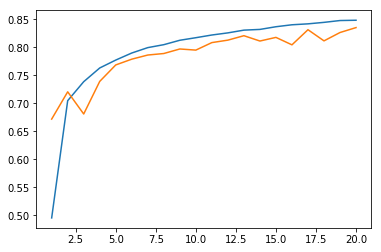

In [13]:
cnn_2 = Sequential()

cnn_2.add(Conv2D(filters=64, kernel_size = (3,3), input_shape=(28,28,1)))
cnn_2.add(Dropout(0.3))
cnn_2.add(MaxPooling2D())

cnn_2.add(Conv2D(filters=64, kernel_size = (3,3), input_shape=(28,28,1)))
cnn_2.add(MaxPooling2D())

cnn_2.add(Conv2D(filters=32, kernel_size = (3,3), input_shape=(28,28,1)))
cnn_2.add(Flatten())
cnn_2.add(Dense(512, activation="relu"))
cnn_2.add(Dense(10, activation="softmax"))
cnn_2.compile(loss="categorical_crossentropy",optimizer="sgd", metrics=["accuracy"])
hist_cnn_2 = cnn_2.fit(x_train, z_train, batch_size = 256, epochs=20, validation_data=[x_test, z_test])
evaluate_model(cnn_2)

Comments: #todo

### Part 4 - Visualize wrongly predictions

#### 8) Create a function visualize_wrongly_predictions() able to show wrong prediction for each class for a given model as input. Use this function for each of the 4 previouly trained models (2 MLP, 2 CNN).

In [62]:
def visualize_wrongly_predictions(model):
    predictions = model.predict(x_test)
    wrong_examples = {}
    wrong_labels = {}
    classes_found = []
    for index, label in enumerate(y_test) :
        predicted_class  = predictions[index].argmax()
        if (predicted_class != label) and (label not in classes_found) :
            classes_found.append(label)
            wrong_examples[label]=x_test[index].reshape(28,28)
            wrong_labels[label] = class_names[predicted_class]
        if len(classes_found) == 10 :
            break
            
    for i in range(10):
        plt.subplot(2, 5,i+1)
        sample = wrong_examples[i]
        plt.imshow(sample)
        plt.title(class_names[i]+"\n predicted \n as "+str(wrong_labels[i]))  

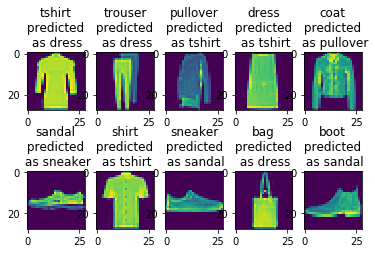

In [63]:
num_classes = 10
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
z_train = keras.utils.to_categorical(y_train, num_classes)
z_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.reshape(A, 784)/255.0
x_test = x_test.reshape(B, 784)/255.0
visualize_wrongly_predictions(mlp_1)
visualize_wrongly_predictions(mlp_2)

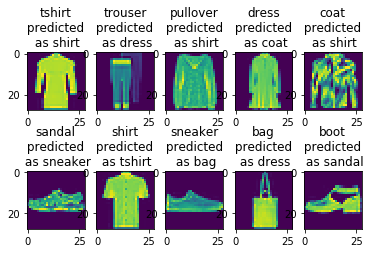

In [64]:
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train  = x_train.reshape(60000,28,28,1)/255.0
x_test = x_test.reshape(10000,28,28,1)/255.0
y_test.reshape(10000,1,1)
y_train.reshape(60000,1,1)
visualize_wrongly_predictions(cnn_1)
visualize_wrongly_predictions(cnn_2)

Comments : Les erreurs de classification semblent être dues à des exemples assez ambigus, pas à des erreurs grossières. Par exemple, aucun tshirt n'a été pris pour un type de chaussure. L'exemple de "shirt predicted as tshirt" est évocateur : à l'exception des boutons, rien ne distingue la chemise d'un tshirt. 

#### 9) Using the code given below, create a function visualize_confusion_matrix() able to display the confusion matrix  for a given model as input. Use this function for each of the 4 previouly trained models (2 MLP, 2 CNN). What is the most common confusion?

In [66]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


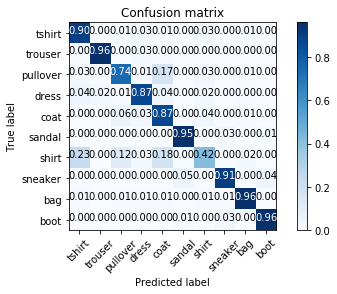

In [70]:
def visualize_confusion_matrix(model):
    y_true = np.array(y_test)
    predictions =  model.predict(x_test)
    y_pred = np.array([p.argmax() for p in predictions])
    
    cm = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(cm, class_names, normalize=True)
    

    


Normalized confusion matrix


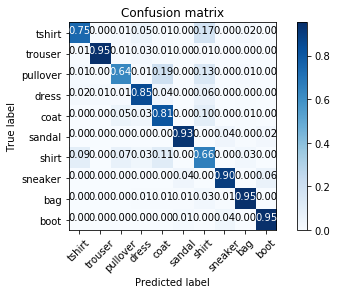

In [73]:
num_classes = 10
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
z_train = keras.utils.to_categorical(y_train, num_classes)
z_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.reshape(A, 784)/255.0
x_test = x_test.reshape(B, 784)/255.0
visualize_confusion_matrix(mlp_1)


Normalized confusion matrix


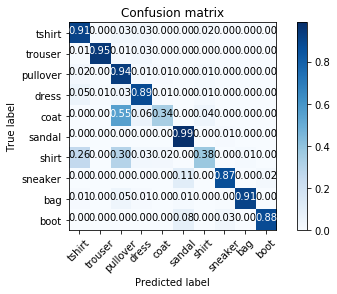

In [74]:
visualize_confusion_matrix(mlp_2)

Normalized confusion matrix


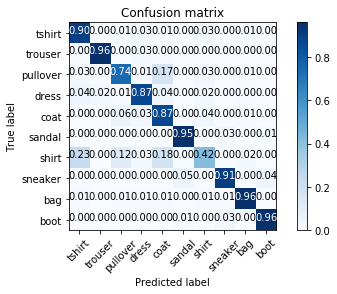

In [75]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train  = x_train.reshape(60000,28,28,1)/255.0
x_test = x_test.reshape(10000,28,28,1)/255.0
y_test.reshape(10000,1,1)
y_train.reshape(60000,1,1)
visualize_confusion_matrix(cnn_1)

Normalized confusion matrix


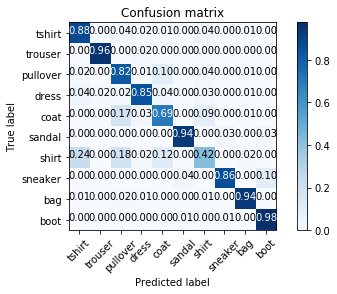

In [76]:
visualize_confusion_matrix(cnn_2)


Most common confusion: The most common confusion are shirt being predicted as something else. This kind of mistake can easily be accounted for : the shirt often has a quite common shape, which can easily be mistaken for something similar-looking such as a dress, a tshit or even a coat. The fact that shirt both come in long-sleeves and short-sleeves surely doesn't make the classification easier. 
C
onclusion: The model seems to be performing pretty well, apart from the caveats aforementioned.

### Part 5 - Data augmentation

#### 10) Based on the documentation (https://keras.io/preprocessing/image/), train one of your CNN architecture using data augmentation and conclude on the used of augmented data.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
epochs = 20

datagen = ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.08,
    height_shift_range=0.08,
    shear_range=0.3, 
    zoom_range=0.08)
model = cnn_2

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train  = x_train.reshape(60000,28,28,1)/255.0
x_test = x_test.reshape(10000,28,28,1)/255.0
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

acc = []
for e in range(epochs):
    print('Epoch', e)
    batches = 0
    for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=32):
        model.fit(x_batch, y_batch)
        batches += 1
        
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break
    acc.append(model.history.history['acc'])

Epoch 0
Epoch 1/1
32/32 [==============================] - 0s 386us/step - loss: 0.3651 - acc: 0.9062
Epoch 1/1
32/32 [==============================] - 0s 158us/step - loss: 0.4156 - acc: 0.8125
Epoch 1/1
32/32 [==============================] - 0s 135us/step - loss: 0.2533 - acc: 0.9375
Epoch 1/1
32/32 [==============================] - 0s 137us/step - loss: 0.5504 - acc: 0.7500
Epoch 1/1
32/32 [==============================] - 0s 144us/step - loss: 0.4388 - acc: 0.8750
Epoch 1/1
32/32 [==============================] - 0s 143us/step - loss: 0.2176 - acc: 0.8750
Epoch 1/1
32/32 [==============================] - 0s 169us/step - loss: 0.2138 - acc: 0.9062
Epoch 1/1
32/32 [==============================] - 0s 146us/step - loss: 0.5782 - acc: 0.8125
Epoch 1/1
32/32 [==============================] - 0s 150us/step - loss: 0.3296 - acc: 0.8125
Epoch 1/1
32/32 [==============================] - 0s 126us/step - loss: 0.3666 - acc: 0.9062
Epoch 1/1
32/32 [==============================] - 0

Epoch 1/1
32/32 [==============================] - 0s 163us/step - loss: 0.4918 - acc: 0.8438
Epoch 1/1
32/32 [==============================] - 0s 162us/step - loss: 0.3483 - acc: 0.8125
Epoch 1/1
32/32 [==============================] - 0s 174us/step - loss: 0.3496 - acc: 0.8750
Epoch 1/1
32/32 [==============================] - 0s 164us/step - loss: 0.3267 - acc: 0.8750
Epoch 1/1
32/32 [==============================] - 0s 141us/step - loss: 0.2556 - acc: 0.8750
Epoch 1/1
32/32 [==============================] - 0s 182us/step - loss: 0.4119 - acc: 0.8125
Epoch 1/1
32/32 [==============================] - 0s 189us/step - loss: 0.3238 - acc: 0.8125
Epoch 1/1
32/32 [==============================] - 0s 136us/step - loss: 0.4165 - acc: 0.9062
Epoch 1/1
32/32 [==============================] - 0s 181us/step - loss: 0.8093 - acc: 0.8125
Epoch 1/1
32/32 [==============================] - 0s 159us/step - loss: 0.5239 - acc: 0.8125
Epoch 1/1
32/32 [==============================] - 0s 142us/

Epoch 1/1
32/32 [==============================] - 0s 174us/step - loss: 0.2389 - acc: 0.8750
Epoch 1/1
32/32 [==============================] - 0s 167us/step - loss: 0.1583 - acc: 1.0000
Epoch 1/1
32/32 [==============================] - 0s 171us/step - loss: 0.2949 - acc: 0.9062
Epoch 1/1
32/32 [==============================] - 0s 172us/step - loss: 0.5041 - acc: 0.7500
Epoch 1/1
32/32 [==============================] - 0s 187us/step - loss: 0.3581 - acc: 0.8125
Epoch 1/1
32/32 [==============================] - 0s 180us/step - loss: 0.3422 - acc: 0.8438
Epoch 1/1
32/32 [==============================] - 0s 179us/step - loss: 0.3007 - acc: 0.8750
Epoch 1/1
32/32 [==============================] - 0s 174us/step - loss: 0.3406 - acc: 0.8125
Epoch 1/1
32/32 [==============================] - 0s 143us/step - loss: 0.2104 - acc: 0.9375
Epoch 1/1
32/32 [==============================] - 0s 161us/step - loss: 0.3073 - acc: 0.8750
Epoch 1/1
32/32 [==============================] - 0s 163us/

Epoch 1/1
32/32 [==============================] - 0s 167us/step - loss: 0.2560 - acc: 0.9375
Epoch 1/1
32/32 [==============================] - 0s 139us/step - loss: 0.3460 - acc: 0.9062
Epoch 1/1
32/32 [==============================] - 0s 178us/step - loss: 0.5106 - acc: 0.7500
Epoch 1/1
32/32 [==============================] - 0s 156us/step - loss: 0.1531 - acc: 1.0000
Epoch 1/1
32/32 [==============================] - 0s 159us/step - loss: 0.2718 - acc: 0.9062
Epoch 1/1
32/32 [==============================] - 0s 190us/step - loss: 0.2262 - acc: 0.9375
Epoch 1/1
32/32 [==============================] - 0s 159us/step - loss: 0.5591 - acc: 0.8438
Epoch 1/1
32/32 [==============================] - 0s 157us/step - loss: 0.3644 - acc: 0.7812
Epoch 1/1
32/32 [==============================] - 0s 167us/step - loss: 0.5636 - acc: 0.8125
Epoch 1/1
32/32 [==============================] - 0s 168us/step - loss: 0.1843 - acc: 0.9375
Epoch 1/1
32/32 [==============================] - 0s 152us/

32/32 [==============================] - 0s 137us/step - loss: 0.2172 - acc: 0.8750
Epoch 1/1
32/32 [==============================] - 0s 155us/step - loss: 0.4853 - acc: 0.8125
Epoch 1/1
32/32 [==============================] - 0s 140us/step - loss: 0.4617 - acc: 0.8750
Epoch 1/1
32/32 [==============================] - 0s 150us/step - loss: 0.1502 - acc: 0.9688
Epoch 1/1
32/32 [==============================] - 0s 145us/step - loss: 0.5359 - acc: 0.7500
Epoch 1/1
32/32 [==============================] - 0s 136us/step - loss: 0.3074 - acc: 0.8125
Epoch 1/1
32/32 [==============================] - 0s 150us/step - loss: 0.3648 - acc: 0.8750
Epoch 1/1
32/32 [==============================] - 0s 149us/step - loss: 0.4635 - acc: 0.8438
Epoch 1/1
32/32 [==============================] - 0s 149us/step - loss: 0.2401 - acc: 0.8438
Epoch 1/1
32/32 [==============================] - 0s 143us/step - loss: 0.2905 - acc: 0.8750
Epoch 1/1
32/32 [==============================] - 0s 186us/step - los

Epoch 1/1
32/32 [==============================] - 0s 136us/step - loss: 0.2835 - acc: 0.8750
Epoch 1/1
32/32 [==============================] - 0s 160us/step - loss: 0.2020 - acc: 0.9688
Epoch 1/1
32/32 [==============================] - 0s 148us/step - loss: 0.3527 - acc: 0.8750
Epoch 1/1
32/32 [==============================] - 0s 177us/step - loss: 0.2387 - acc: 0.9062
Epoch 1/1
32/32 [==============================] - 0s 179us/step - loss: 0.2034 - acc: 0.9688
Epoch 1/1
32/32 [==============================] - 0s 170us/step - loss: 0.2711 - acc: 0.9062
Epoch 1/1
32/32 [==============================] - 0s 160us/step - loss: 0.2424 - acc: 0.8750
Epoch 1/1
32/32 [==============================] - 0s 153us/step - loss: 0.5246 - acc: 0.8438
Epoch 1/1
32/32 [==============================] - 0s 168us/step - loss: 0.3746 - acc: 0.8438
Epoch 1/1
32/32 [==============================] - 0s 162us/step - loss: 0.5928 - acc: 0.7812
Epoch 1/1
32/32 [==============================] - 0s 151us/

Epoch 1/1
32/32 [==============================] - 0s 144us/step - loss: 0.3950 - acc: 0.8438
Epoch 1/1
32/32 [==============================] - 0s 142us/step - loss: 0.3018 - acc: 0.9062
Epoch 1/1
32/32 [==============================] - 0s 178us/step - loss: 0.4342 - acc: 0.8438
Epoch 1/1
32/32 [==============================] - 0s 150us/step - loss: 0.5464 - acc: 0.8438
Epoch 1/1
32/32 [==============================] - 0s 154us/step - loss: 0.5953 - acc: 0.7500
Epoch 1/1
32/32 [==============================] - 0s 154us/step - loss: 0.1625 - acc: 0.9688
Epoch 1/1
32/32 [==============================] - 0s 132us/step - loss: 0.2777 - acc: 0.8750
Epoch 1/1
32/32 [==============================] - 0s 150us/step - loss: 0.4784 - acc: 0.7500
Epoch 1/1
32/32 [==============================] - 0s 169us/step - loss: 0.6201 - acc: 0.7188
Epoch 1/1
32/32 [==============================] - 0s 157us/step - loss: 0.3360 - acc: 0.9375
Epoch 1/1
32/32 [==============================] - 0s 149us/

32/32 [==============================] - 0s 145us/step - loss: 0.4451 - acc: 0.8125
Epoch 1/1
32/32 [==============================] - 0s 164us/step - loss: 0.1952 - acc: 0.9688
Epoch 1/1
32/32 [==============================] - 0s 170us/step - loss: 0.3312 - acc: 0.9062
Epoch 1/1
32/32 [==============================] - 0s 174us/step - loss: 0.3694 - acc: 0.8750
Epoch 1/1
32/32 [==============================] - 0s 174us/step - loss: 0.2848 - acc: 0.8750
Epoch 1/1
32/32 [==============================] - 0s 152us/step - loss: 0.5624 - acc: 0.8125
Epoch 1/1
32/32 [==============================] - 0s 174us/step - loss: 0.4216 - acc: 0.8438
Epoch 1/1
32/32 [==============================] - 0s 164us/step - loss: 0.3374 - acc: 0.8438
Epoch 1/1
32/32 [==============================] - 0s 165us/step - loss: 0.1769 - acc: 0.9375
Epoch 1/1
32/32 [==============================] - 0s 170us/step - loss: 0.4379 - acc: 0.8438
Epoch 1/1
32/32 [==============================] - 0s 179us/step - los

Epoch 1/1
32/32 [==============================] - 0s 155us/step - loss: 0.4396 - acc: 0.8438
Epoch 1/1
32/32 [==============================] - 0s 140us/step - loss: 0.4988 - acc: 0.8438
Epoch 1/1
32/32 [==============================] - 0s 146us/step - loss: 0.2372 - acc: 0.8750
Epoch 1/1
32/32 [==============================] - 0s 134us/step - loss: 0.3573 - acc: 0.8750
Epoch 1/1
32/32 [==============================] - 0s 141us/step - loss: 0.3551 - acc: 0.8438
Epoch 1/1
32/32 [==============================] - 0s 156us/step - loss: 0.2055 - acc: 0.9375
Epoch 1/1
32/32 [==============================] - 0s 156us/step - loss: 0.2779 - acc: 0.8750
Epoch 1/1
32/32 [==============================] - 0s 176us/step - loss: 0.5634 - acc: 0.7500
Epoch 1/1
32/32 [==============================] - 0s 154us/step - loss: 0.2348 - acc: 0.9062
Epoch 1/1
32/32 [==============================] - 0s 152us/step - loss: 0.2059 - acc: 0.9688
Epoch 1/1
32/32 [==============================] - 0s 168us/

Epoch 1/1
32/32 [==============================] - 0s 175us/step - loss: 0.2274 - acc: 0.9062
Epoch 1/1
32/32 [==============================] - 0s 143us/step - loss: 0.2126 - acc: 0.9062
Epoch 1/1
32/32 [==============================] - 0s 151us/step - loss: 0.2810 - acc: 0.9375
Epoch 1/1
32/32 [==============================] - 0s 156us/step - loss: 0.1530 - acc: 0.9688
Epoch 1/1
32/32 [==============================] - 0s 133us/step - loss: 0.2847 - acc: 0.9375
Epoch 1/1
32/32 [==============================] - 0s 177us/step - loss: 0.1562 - acc: 0.9375
Epoch 1/1
32/32 [==============================] - 0s 169us/step - loss: 0.2553 - acc: 0.9062
Epoch 1/1
32/32 [==============================] - 0s 170us/step - loss: 0.2879 - acc: 0.9062
Epoch 1/1
32/32 [==============================] - 0s 153us/step - loss: 0.1336 - acc: 0.9688
Epoch 1/1
32/32 [==============================] - 0s 171us/step - loss: 0.7623 - acc: 0.6250
Epoch 1/1
32/32 [==============================] - 0s 156us/

Epoch 1/1
32/32 [==============================] - 0s 152us/step - loss: 0.1459 - acc: 0.9375
Epoch 1/1
32/32 [==============================] - 0s 156us/step - loss: 0.2470 - acc: 0.8750
Epoch 1/1
32/32 [==============================] - 0s 169us/step - loss: 0.3198 - acc: 0.9062
Epoch 1/1
32/32 [==============================] - 0s 139us/step - loss: 0.1939 - acc: 0.8750
Epoch 1/1
32/32 [==============================] - 0s 176us/step - loss: 0.3484 - acc: 0.8125
Epoch 1/1
32/32 [==============================] - 0s 177us/step - loss: 0.4288 - acc: 0.8125
Epoch 1/1
32/32 [==============================] - 0s 168us/step - loss: 0.1557 - acc: 0.9062
Epoch 1/1
32/32 [==============================] - 0s 135us/step - loss: 0.2849 - acc: 0.9062
Epoch 1/1
32/32 [==============================] - 0s 162us/step - loss: 0.3059 - acc: 0.8750
Epoch 1/1
32/32 [==============================] - 0s 164us/step - loss: 0.4577 - acc: 0.8438
Epoch 1/1
32/32 [==============================] - 0s 169us/

[0.84375]


ValueError: x and y must have same first dimension, but have shapes (300,) and (1,)

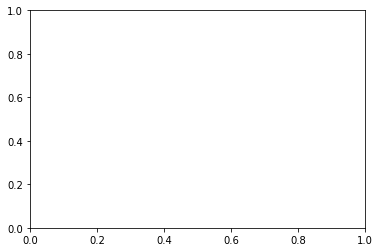

In [96]:

plt.plot([i for i in range(batches)], acc)
plt.show()

Comments: Data augmentation allows us to generate more data, and especially less context-dependent one. Concretely, the data is transformed using simple transformation (rotation for instance) , so that the shape (which is the important part in recognizing clothes) remains the only important data 

### Part 6 - Transfer learning from VGG16 trained on ImageNet

Transfer learning, is a research problem in machine learning that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem.

In this part, you will do fine tuning on a pre-trained network. Fine-tuning consists in starting from a trained network, then re-training it on a new dataset using very small weight updates. To do so, you need to load a pre-trained model, add a dense classifier to compute the output, and then to freeze the weights of the pre-trained model (https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html).   

#### 11) Exploit an architecture already trained on ImageNet (https://keras.io/applications) to improve the classification results on Fashion-MNIST.

In [ ]:
from keras import applications
from skimage.transform import resize

# to do

In [ ]:
# to do

Conclusion: #todo

#### 12) Challenge: the first 3 teams in terms of overall test accuracy results (whatever the methodology used) will obtain bonus points!

Best accuracy reached: #todo

Conclusions: #todo